# **Завдання першого рівня**

In [2]:
pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit as ti
from ucimlrepo import fetch_ucirepo
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

In [4]:
household_electric = fetch_ucirepo(id=235)

Data = household_electric.data.features

Data_df = pd.DataFrame(Data)

Data_df.to_csv('household_electric.csv', index=False)

print(Data_df)

/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

In [5]:
data_df = pd.read_csv('household_electric.csv', na_values='?', dtype={'Global_active_power': float, 'Global_reactive_power': float, 'Voltage': float, 'Global_intensity': float, 'Sub_metering_1': float, 'Sub_metering_2': float, 'Sub_metering_3': float})
data_df = data_df.dropna()
data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])

for column in data_df.columns[2:-1]:
    data_df[column] = pd.to_numeric(data_df[column], errors='coerce')

data_np = data_df.to_numpy()

print(data_np.shape)
print(data_np)

/tmp/ipython-input-5-123062470.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])


(2049280, 10)
[['16/12/2006' '17:24:00' 4.216 ... 1.0 17.0
  Timestamp('2006-12-16 17:24:00')]
 ['16/12/2006' '17:25:00' 5.36 ... 1.0 16.0
  Timestamp('2006-12-16 17:25:00')]
 ['16/12/2006' '17:26:00' 5.374 ... 2.0 17.0
  Timestamp('2006-12-16 17:26:00')]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0
  Timestamp('2010-11-26 21:00:00')]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0
  Timestamp('2010-11-26 21:01:00')]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0
  Timestamp('2010-11-26 21:02:00')]]


*Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт.*

In [6]:
def task1_np(data):
    return data[data[:, 2] > 5]

def task1_df(data):
    return data[data['Global_active_power'] > 5]

print('Numpy array:\n', task1_np(data_np)[:, [0, 1, 2]])
print("Execution time with numpy array:", ti.timeit(lambda: task1_np(data_np), number=1))
print('DataFrame:\n', task1_df(data_df)[['Date', 'Time', 'Global_active_power']])
print("Execution time with DataFrame:", ti.timeit(lambda: task1_df(data_df), number=1))

Numpy array:
 [['16/12/2006' '17:25:00' 5.36]
 ['16/12/2006' '17:26:00' 5.374]
 ['16/12/2006' '17:27:00' 5.388]
 ...
 ['24/11/2010' '07:50:00' 5.172]
 ['24/11/2010' '07:51:00' 5.75]
 ['25/11/2010' '07:21:00' 5.074]]
Execution time with numpy array: 0.08323060700001861
DataFrame:
                Date      Time  Global_active_power
1        16/12/2006  17:25:00                5.360
2        16/12/2006  17:26:00                5.374
3        16/12/2006  17:27:00                5.388
11       16/12/2006  17:35:00                5.412
12       16/12/2006  17:36:00                5.224
...             ...       ...                  ...
2069356  22/11/2010  18:40:00                5.408
2069357  22/11/2010  18:41:00                5.528
2071586  24/11/2010  07:50:00                5.172
2071587  24/11/2010  07:51:00                5.750
2072997  25/11/2010  07:21:00                5.074

[17547 rows x 3 columns]
Execution time with DataFrame: 0.007722171999944294


*Обрати всі записи, у яких вольтаж перевищують 235 В.*

In [ ]:
def task2_np(data):
    return data[data[:, 4] > 235]

def task2_df(data):
    return data[data['Voltage'] > 235]

print('Numpy array:\n', task2_np(data_np)[:, [0, 1, 4]])
print("Execution time with numpy array:", ti.timeit(lambda: task1_np(data_np), number=1))
print('DataFrame:\n', task2_df(data_df)[['Date', 'Time', 'Voltage']])
print("Execution time with DataFrame:", ti.timeit(lambda: task1_df(data_df), number=1))

*Обрати всі записи, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.*

In [7]:
def task3_np(data):
    return data[(data[:, 5] >= 19) & (data[:, 5] <= 20) & (data[:, 7] > data[:, 8])]

def task3_df(data):
    return data[(data['Global_intensity'] >= 19) & (data['Global_intensity'] <= 20) & (data['Sub_metering_2'] > data['Sub_metering_3'])]

print('Numpy array:\n', task3_np(data_np)[:, [0, 1, 5, 7, 8]])
print("Execution time with numpy array:", ti.timeit(lambda: task3_np(data_np), number=1))
print('DataFrame:\n', task3_df(data_df)[['Date', 'Time', 'Global_intensity', 'Sub_metering_2', 'Sub_metering_3']])
print("Execution time with DataFrame:", ti.timeit(lambda: task3_df(data_df), number=1))

Numpy array:
 [['16/12/2006' '18:09:00' 19.0 37.0 16.0]
 ['17/12/2006' '01:04:00' 19.6 13.0 0.0]
 ['17/12/2006' '01:08:00' 19.6 27.0 0.0]
 ...
 ['24/11/2010' '07:55:00' 19.4 40.0 17.0]
 ['24/11/2010' '07:56:00' 19.0 39.0 17.0]
 ['24/11/2010' '07:57:00' 19.4 39.0 17.0]]
Execution time with numpy array: 0.17706922600007147
DataFrame:
                Date      Time  Global_intensity  Sub_metering_2  \
45       16/12/2006  18:09:00              19.0            37.0   
460      17/12/2006  01:04:00              19.6            13.0   
464      17/12/2006  01:08:00              19.6            27.0   
475      17/12/2006  01:19:00              19.4            36.0   
476      17/12/2006  01:20:00              19.4            35.0   
...             ...       ...               ...             ...   
2071589  24/11/2010  07:53:00              19.8            39.0   
2071590  24/11/2010  07:54:00              19.8            39.0   
2071591  24/11/2010  07:55:00              19.4            40.

*Обрати випадковим чином 500000 записів (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії*

In [8]:
def task4_np(data):
    global random_sample_np
    random_sample_np = data[np.random.choice(data_np.shape[0], size=500000, replace=False), :]
    average_consumption = np.mean(random_sample_np[:, 6:9], axis=0)
    return average_consumption

def task4_df(data):
    global random_sample_df
    random_sample_df = data.sample(n=500000, replace=False)
    average_consumption = random_sample_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return average_consumption

print('Numpy array:\n', task4_np(data_np))
print("Execution time with numpy array:", ti.timeit(lambda: task4_np(data_np), number=1))
print('DataFrame:\n', task4_df(data_df))
print("Execution time with DataFrame:", ti.timeit(lambda: task4_df(data_df), number=1))

Numpy array:
 [1.116228 1.292546 6.474572]
Execution time with numpy array: 3.866165131000116
DataFrame:
 Sub_metering_1    1.126966
Sub_metering_2    1.301150
Sub_metering_3    6.460668
dtype: float64
Execution time with DataFrame: 0.46116451500006406


*Обрати ті записи, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.*

In [9]:
def task5_np(random_sample):
    hours = np.array([int(time.split(':')[0]) for time in random_sample[:, 1]])

    after_18 = random_sample[hours >= 18]

    high_power_consumption = after_18[after_18[:, 2].astype(float) > 6]

    filtered_households = high_power_consumption[
        (high_power_consumption[:, 6].astype(float) +
         high_power_consumption[:, 7].astype(float) +
         high_power_consumption[:, 8].astype(float)) > 6]

    first_half = filtered_households[0:len(filtered_households) // 2:3]
    second_half = filtered_households[len(filtered_households) // 2::4]
    result = np.concatenate([first_half, second_half])

    return result

def task5_df(random_sample):

    df_after_18 = random_sample[random_sample['DateTime'].dt.hour >= 18]

    average_power_consumption = df_after_18.groupby('DateTime')['Global_active_power'].mean()

    high_power_consumption = average_power_consumption[average_power_consumption > 6]

    filtered_households = random_sample[random_sample['DateTime'].isin(high_power_consumption.index)]
    filtered_households = filtered_households[(filtered_households['Sub_metering_1'] + filtered_households['Sub_metering_2'] + filtered_households['Sub_metering_3']) > 6]

    first_half = filtered_households.iloc[:len(filtered_households)//2]
    second_half = filtered_households.iloc[len(filtered_households)//2:]

    result = pd.concat([first_half.iloc[::3], second_half.iloc[::4]])
    return result

print('Numpy array:\n', task5_np(data_np))
print("Execution time with numpy array:", ti.timeit(lambda: task5_np(data_np), number=1))
print('DataFrame:\n', task5_df(data_df))
print("Execution time with DataFrame:", ti.timeit(lambda: task5_df(data_df), number=1))

Numpy array:
 [['16/12/2006' '18:05:00' 6.052 ... 37.0 17.0
  Timestamp('2006-12-16 18:05:00')]
 ['16/12/2006' '18:08:00' 6.308 ... 36.0 17.0
  Timestamp('2006-12-16 18:08:00')]
 ['17/12/2006' '18:18:00' 6.204 ... 0.0 16.0
  Timestamp('2006-12-17 18:18:00')]
 ...
 ['20/11/2010' '18:40:00' 6.416 ... 35.0 16.0
  Timestamp('2010-11-20 18:40:00')]
 ['20/11/2010' '18:44:00' 6.374 ... 36.0 16.0
  Timestamp('2010-11-20 18:44:00')]
 ['20/11/2010' '18:52:00' 6.364 ... 34.0 16.0
  Timestamp('2010-11-20 18:52:00')]]
Execution time with numpy array: 1.2157722260001265
DataFrame:
                Date      Time  Global_active_power  Global_reactive_power  \
41       16/12/2006  18:05:00                6.052                  0.192   
44       16/12/2006  18:08:00                6.308                  0.116   
1494     17/12/2006  18:18:00                6.204                  0.116   
8884     22/12/2006  21:28:00                7.884                  0.136   
8887     22/12/2006  21:31:00           

# **Другий рівень (ускладнений)**

In [6]:
heart_disease = fetch_ucirepo (id=45)

X = heart_disease.data.features

X_df = pd.DataFrame(X)

X_df.to_csv('heart_disease.csv', index=False)

print(X_df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

In [18]:
heart_disease_df =  pd.read_csv('heart_disease.csv')
print("Кількість пропущених значень по стовпцях:")
print(heart_disease_df.isnull().sum())
print("Всього пропущених значень:", heart_disease_df.isnull().sum().sum())

heart_disease_df = heart_disease_df.dropna()
print("Пропущені після заповнення:", heart_disease_df.isnull().sum().sum())

print(heart_disease_df)

Кількість пропущених значень по стовпцях:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64
Всього пропущених значень: 6
Пропущені після заповнення: 0
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   57    0   4       140   241    0        0      123      1      0.2   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4   

*Пронормувати вибраний датасет*

In [19]:
def normalize_dataframe(df):
    df_normalized = df.copy()
    for column in df_normalized.columns:
        min_val = df_normalized[column].min()
        max_val = df_normalized[column].max()
        if max_val != min_val:
            df_normalized[column] = (df_normalized[column] - min_val) / (max_val - min_val)
        else:
            df_normalized[column] = 0
    return df_normalized

heart_disease_df_normalized = normalize_dataframe(heart_disease_df)

print(heart_disease_df_normalized.head())

        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal  
0  0.370968    1.0  0.000000  0.75  
1  0.241935    0.5  1.000000  0.00  
2  0.419355    0.5  0.666667  1.00  
3  0.564516    1.0  0.000000  0.00  
4  0.225806    0.0  0.000000  0.00  


*Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.*

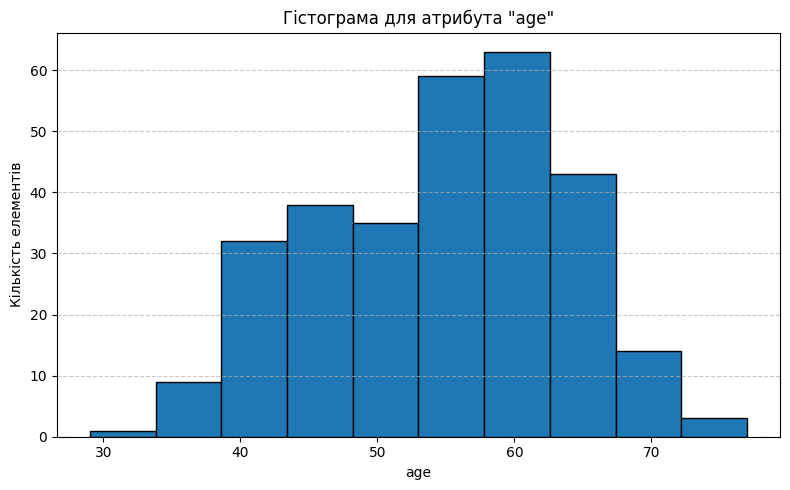

In [20]:
attribute = 'age'

plt.figure(figsize=(8, 5))
plt.hist(heart_disease_df[attribute], bins=10, edgecolor='black')
plt.title(f'Гістограма для атрибута "{attribute}"')
plt.xlabel(attribute)
plt.ylabel('Кількість елементів')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Збудувати графік залежності одного integer/real атрибута від іншого.*

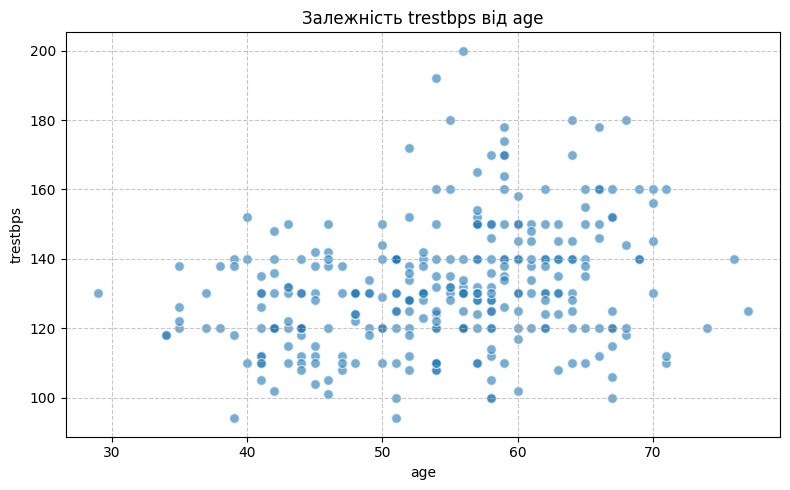

In [14]:
x_attr = 'age'
y_attr = 'trestbps'

plt.figure(figsize=(8, 5))
plt.scatter(heart_disease_df[x_attr], X_df_filled[y_attr], alpha=0.6, edgecolors='w', s=50)
plt.title(f'Залежність {y_attr} від {x_attr}')
plt.xlabel(x_attr)
plt.ylabel(y_attr)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів*

In [21]:
attribute1 = 'age'
attribute2 = 'trestbps'

pearson_corr = heart_disease_df[attribute1].corr(heart_disease_df[attribute2])
spearman_corr = heart_disease_df[attribute1].corr(heart_disease_df[attribute2], method='spearman')

print(f'Коефіцієнт Пірсона між {attribute1} і {attribute2}: {pearson_corr}')
print(f'Коефіцієнт Спірмена між {attribute1} і {attribute2}: {spearman_corr}')

Коефіцієнт Пірсона між age і trestbps: 0.29047626246129754
Коефіцієнт Спірмена між age і trestbps: 0.29960965493061253


*Провести One Hot Encoding категоріального string атрибуту.*

In [22]:
column_to_encode = 'sex'

encoded_df = pd.get_dummies(heart_disease_df[column_to_encode], prefix=column_to_encode)

heart_disease_encoded = pd.concat([heart_disease_df, encoded_df], axis=1)

print(heart_disease_encoded.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  sex_0  sex_1  
0  0.0   6.0  False   True  
1  3.0   3.0  False   True  
2  2.0   7.0  False   True  
3  0.0   3.0  False   True  
4  0.0   3.0   True  False  


*Провести візуалізацію багатовимірних даних*

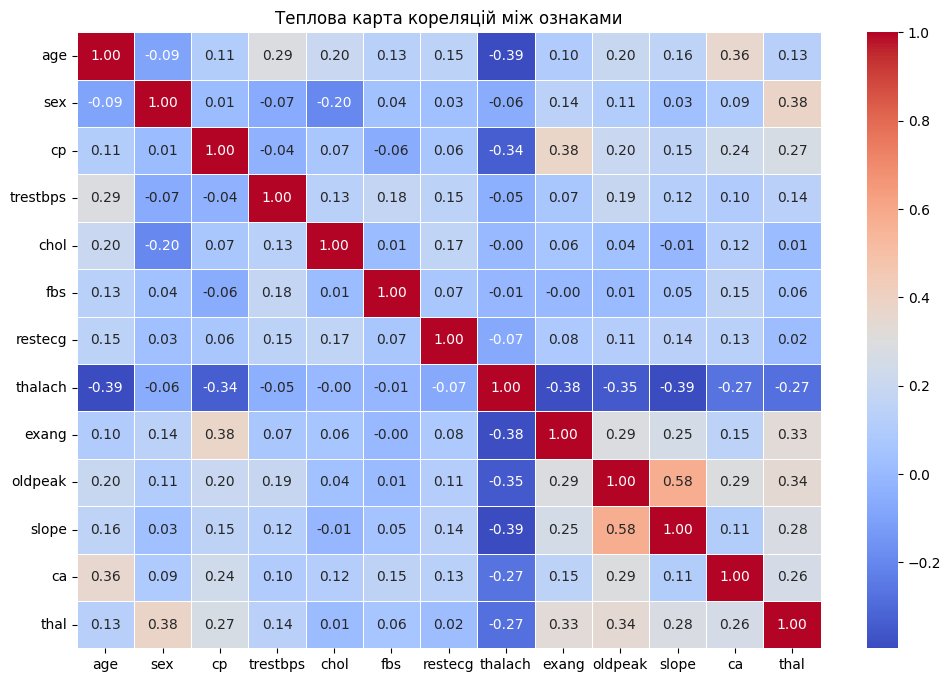

In [23]:
corr_matrix = heart_disease_df.corr(numeric_only=True)

# Побудова теплової карти
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Теплова карта кореляцій між ознаками')
plt.show()